In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Dataset Characteristics:
### Number of instances:
20640

### Number of Attributes:
8 numeric, predictive attributes and the target

### Attribute Information:
    * MedInc: median income in block
    * HouseAge: median house age in block
    * AveRooms: average number of rooms
    * AveBedrms: average number of bedrooms
    * Population: block population
    * AveOccp: average house occupancy
    *Latitude: house block latitude
    *Longitude: house block longitude

### Target
The target variable is the median house value in units of 100,000 for California districts.

### Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)        #by default 75-25 train test split takes place

In [6]:
#Standardizing the data means subtracting mean from each observation and then dividing by std. for make mean=0 and std = 1.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
x_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
#keras.Layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss = "mean_squared_error", 
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics = ['mae'])          #mean aabsolute error. calulated by  subtracting mean value from sample value 

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.5542 - mae: 1.1398 - val_loss: 0.8390 - val_mae: 0.6849
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8402 - mae: 0.6835 - val_loss: 0.6766 - val_mae: 0.6067
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7199 - mae: 0.6257 - val_loss: 0.6139 - val_mae: 0.5705
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6642 - mae: 0.5956 - val_loss: 0.5684 - val_mae: 0.5460
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6194 - mae: 0.5726 - val_loss: 0.5299 - val_mae: 0.5262
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5811 - mae: 0.5530 - val_loss: 0.4980 - val_mae: 0.5091
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5491 - mae: 0.5361 - val_loss: 0.4730 - val_mae: 0.4952
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5234 - mae: 0.5222 - val_loss: 0.4534 - val_mae: 0.4841
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [13]:
mae_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3937 - mae: 0.4475


In [14]:
model_history.history

{'loss': [1.967812180519104,
  0.7646689414978027,
  0.668715238571167,
  0.6175944209098816,
  0.5762308239936829,
  0.5413900017738342,
  0.5129719376564026,
  0.4907509982585907,
  0.4732955992221832,
  0.45945116877555847,
  0.44817641377449036,
  0.43885427713394165,
  0.4309883713722229,
  0.4242827892303467,
  0.4185623526573181,
  0.41366270184516907,
  0.40933871269226074,
  0.4055114686489105,
  0.4020775854587555,
  0.3989863395690918],
 'mae': [0.9259735941886902,
  0.6515799760818481,
  0.60316401720047,
  0.5756667852401733,
  0.5539834499359131,
  0.5354136228561401,
  0.5199020504951477,
  0.5073785781860352,
  0.4973559081554413,
  0.4892399311065674,
  0.48259225487709045,
  0.47696158289909363,
  0.47216635942459106,
  0.46800878643989563,
  0.46436867117881775,
  0.461162805557251,
  0.45829522609710693,
  0.45574143528938293,
  0.4534589350223541,
  0.45136862993240356],
 'val_loss': [0.8389731049537659,
  0.6766225695610046,
  0.6138884425163269,
  0.5683683156967

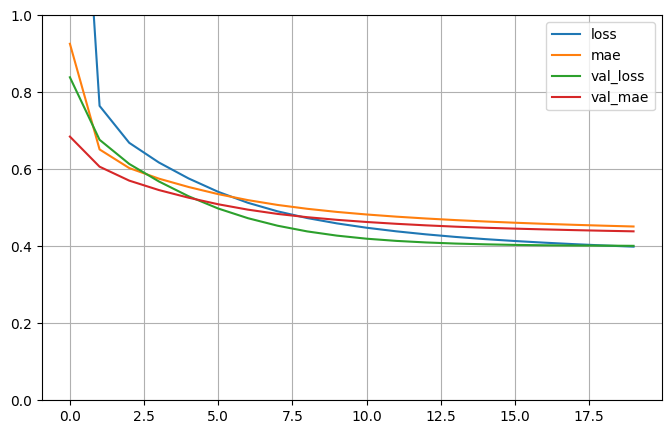

In [15]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [16]:
model_history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4132 - mae: 0.4592 - val_loss: 0.4009 - val_mae: 0.4376
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4103 - mae: 0.4573 - val_loss: 0.4005 - val_mae: 0.4364
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4077 - mae: 0.4556 - val_loss: 0.4001 - val_mae: 0.4353
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4053 - mae: 0.4541 - val_loss: 0.3994 - val_mae: 0.4343
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4031 - mae: 0.4526 - val_loss: 0.3989 - val_mae: 0.4334
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4010 - mae: 0.4513 - val_loss: 0.3982 - val_mae: 0.4324
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3991 - mae: 0.4500 - val_loss: 0.3976 - val_mae: 0.4316
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3974 - mae: 0.4488 - val_loss: 0.3970 - val_mae: 0.4308
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

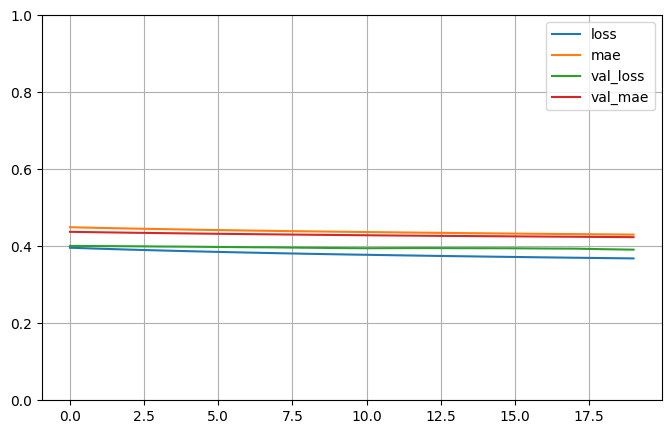

In [17]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [18]:
del model          #deleting created model for creating new model

In [21]:
keras.backend.clear_session()

## Functional API
Not all neural network models are simply sequential. Some may have complex topologies. Some have multiple inputs and/or multiple outputs. For example.A wide and deep neural network connect all or part of the inputs directly to the output layer.

In [40]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [41]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 30)                │             270 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 30)                │             930 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 38)                │               0 │ input_layer_1[0][0],       │
│                               │                           │                 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │              39 │ concatenate_1[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ["mae"])

In [43]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9744 - mae: 1.0631 - val_loss: 3.2331 - val_mae: 0.6134
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7126 - mae: 0.6018 - val_loss: 1.0949 - val_mae: 0.5753
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6624 - mae: 0.5842 - val_loss: 0.6218 - val_mae: 0.5422
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6209 - mae: 0.5648 - val_loss: 0.5598 - val_mae: 0.5258
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5916 - mae: 0.5515 - val_loss: 0.5197 - val_mae: 0.5112
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5668 - mae: 0.5394 - val_loss: 0.5007 - val_mae: 0.5014
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465 - mae: 0.5296 - val_loss: 0.4820 - val_mae: 0.4924
Epoch 8/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5293 - mae: 0.5211 - val_loss: 0.4681 - val_mae: 0.4852
Epoch 9/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [44]:
# This loss value is for a batch size of 32 (default value). To look at the total loss value just print "mse_test" value
mae_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3679 - mae: 0.4337


In [45]:
print(mae_test)

[0.36900949478149414, 0.43390923738479614]


In [46]:
model_history.history

{'loss': [1.2229549884796143,
  0.6820616126060486,
  0.614565372467041,
  0.582197904586792,
  0.5543345808982849,
  0.53313809633255,
  0.5151721835136414,
  0.5001965165138245,
  0.4875149428844452,
  0.4767239987850189,
  0.46744439005851746,
  0.4592862129211426,
  0.45200133323669434,
  0.44531354308128357,
  0.43921124935150146,
  0.4336596429347992,
  0.42859119176864624,
  0.4239937365055084,
  0.4197985529899597,
  0.41597411036491394,
  0.4124498963356018,
  0.40922805666923523,
  0.40626081824302673,
  0.40348491072654724,
  0.400897741317749,
  0.39848610758781433,
  0.3962227702140808,
  0.39412006735801697,
  0.3921385109424591,
  0.39026132225990295,
  0.3884828984737396,
  0.3867853283882141,
  0.3851916193962097,
  0.38371068239212036,
  0.38235920667648315,
  0.38097402453422546,
  0.37971463799476624,
  0.3785710036754608,
  0.3773392140865326,
  0.3762788772583008],
 'mae': [0.7726123332977295,
  0.5855833888053894,
  0.5629668831825256,
  0.547821044921875,
  0.53

<function matplotlib.pyplot.show(close=None, block=None)>

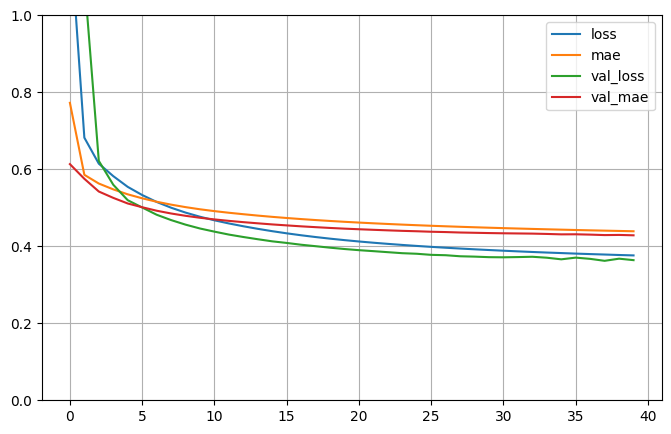

In [47]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show

# Saving and Restoring

In [49]:
model.save("my_func_model.keras")     # we can also save the model using .h5 file format

In [50]:
%pwd

'C:\\Users\\Abhishek\\OneDrive\\Desktop\\ML and DL\\Deep Learning'

In [52]:
%cd C:\\Users\\Abhishek\\OneDrive\\Desktop\\ML and DL\\Deep Learning

C:\Users\Abhishek\OneDrive\Desktop\ML and DL\Deep Learning


In [53]:
del model

In [54]:
keras.backend.clear_session()

In [56]:
model = keras.models.load_model("my_func_model.keras")

In [57]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 30)                │             270 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 30)                │             930 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 38)                │               0 │ input_layer_1[0][0],       │
│                               │                           │                 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │              39 │ concatenate_1[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,241 (4.85 KB)

In [59]:
y_pred = model.predict(x_test)
print(y_pred)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.6322851]
 [1.7593899]
 [3.6502066]
 ...
 [1.4391197]
 [2.5362527]
 [3.9808962]]


## using Callbacks during Training

In [61]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [64]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [65]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.keras")
#Here {epoch:02d} this is used for generating 2 digit numbers for each epoch and it is used to naming the file name after each epoch. If we want 3 digit no. then {epoch:03d} will be used and so on.

In [66]:
history = model.fit(x_train, y_train, epochs = 10,
                   validation_data = (x_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2043 - val_loss: 1.4311
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9219 - val_loss: 0.7645
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8074 - val_loss: 0.7113
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7433 - val_loss: 0.6570
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6967 - val_loss: 0.6266
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6589 - val_loss: 0.6006
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6265 - val_loss: 0.5708
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5980 - val_loss: 0.5455
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5728 - val_loss: 0.5203
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5505 - val_loss: 0.4984


In [67]:
del model
keras.backend.clear_session()

In [68]:
model = keras.models.load_model("Model-10.keras")

In [69]:
mse_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5158


## Best Model Only
It will save the best model which performed best on validation set.

In [70]:
del model 
keras.backend.clear_session()

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape=[8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [72]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.keras", save_best_only = True)

In [75]:
history = model.fit(x_train, y_train, epochs = 10,
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4566 - val_loss: 0.8050
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7853 - val_loss: 0.6575
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7127 - val_loss: 0.6161
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6631 - val_loss: 0.5823
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6234 - val_loss: 0.5500
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5895 - val_loss: 0.5209
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5600 - val_loss: 0.4961
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5339 - val_loss: 0.4763
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5115 - val_loss: 0.4552
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4924 - val_loss: 0.4367


In [76]:
model = keras.models.load_model("Best_Model.keras")   #rollback to best model
mse_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4528


## Best Model Only

In [85]:
del model
keras.backend.clear_session()


In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [88]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.keras", save_best_only = True)

In [89]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)
# patience: Number of epochs with no improvement after which training will be stopped.

In [92]:
history = model.fit(x_train, y_train, epochs = 200,
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3464 - val_loss: 0.3408
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3460 - val_loss: 0.3385
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3456 - val_loss: 0.3417
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3452 - val_loss: 0.3395
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3447 - val_loss: 0.3428
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3444 - val_loss: 0.3418
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3440 - val_loss: 0.3425
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3436 - val_loss: 0.3417
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3432 - val_loss: 0.3412
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3428 - val_loss: 0.3401


In [93]:
model = keras.models.load_model("early_stop_model.keras")
mse_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3420
